## Esercizio 1
### Da plotly.express importiamo i dataset stocks, mediante: 
### from plotly import express as px
### stocks = px.data.stocks()

In [2]:
from plotly import express as px
from matplotlib import pyplot as plt
stocks = px.data.stocks()

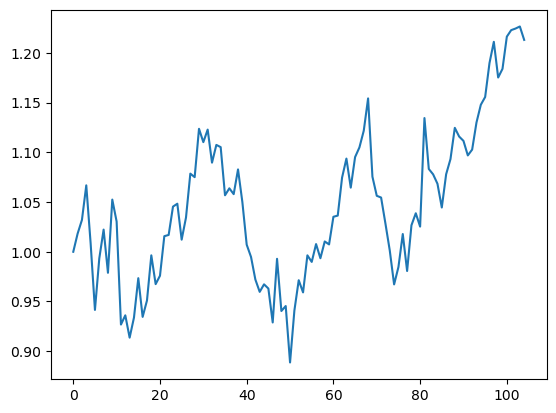

In [10]:
# estraiamo i dati della colonna GOOG relative all'andamento delle azioni di Google, e visualizziamolo mediante pyplot
stocks["GOOG"]
plt.plot(stocks["GOOG"]);

In [4]:
#estraiamo le prime 5 righe della colonna GOOG e della colonna date, e usiamoli come ascisse e ordinate su un grafico mediante pyplot.
y= stocks.loc[:4,"GOOG"]
x= stocks.loc[:4,"date"]

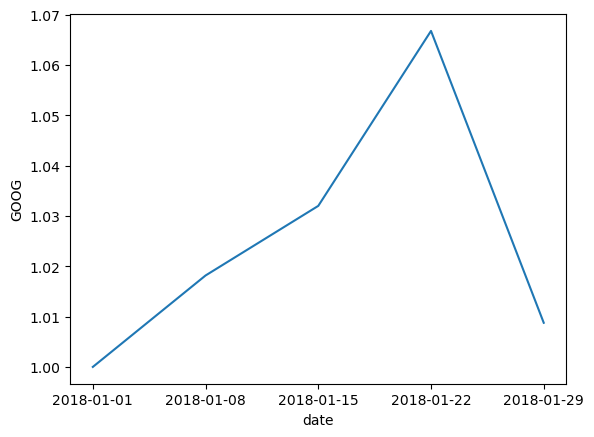

In [11]:
plt.plot(x,y)
plt.xlabel("date")
plt.ylabel("GOOG");

In [7]:
# facciamo lo stesso per le ultime 5 righe del dataset
x1= stocks.tail(5)["date"]
y1= stocks.tail(5)["GOOG"]

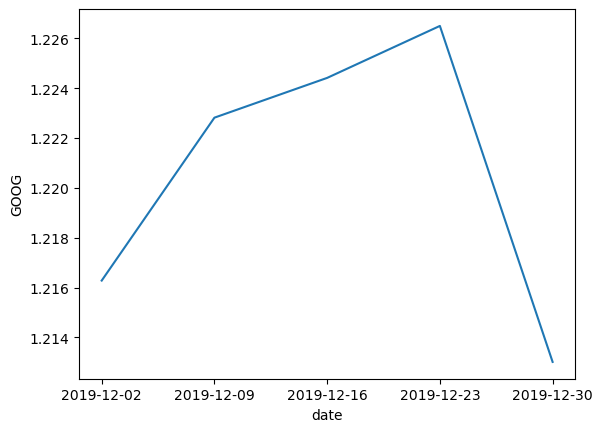

In [12]:
plt.plot(x1,y1)
plt.xlabel("date")
plt.ylabel("GOOG");

### estraimo le prime 20 istanze della colonna AAPL delle azioni di Apple, e visualizziamo il grafico tramite pyplot, in modo che:
* il grafico sia rosso
* la linea sia tratteggiata
* vi sia un pallino come marker
* l'asse delle ascisse si chiami "Data"
* l'asse dell ordinate si chiami "Valore"
* il titolo del grafico sia "Azioni Apple"
* il markerfacecolor sia nero
* la linea abbia spessore uguale a 2

Text(0.5, 1.0, 'Azioni Apple')

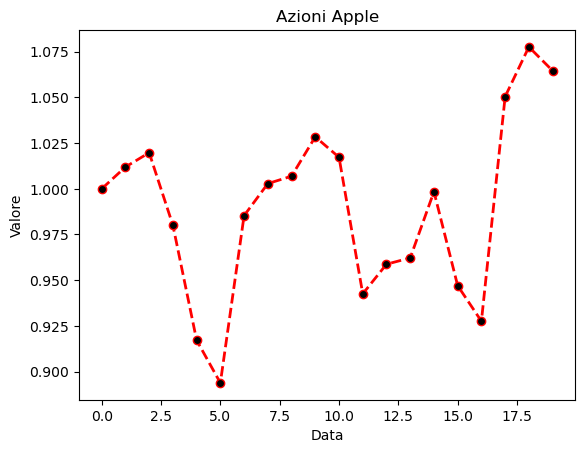

In [115]:
azioni_apple=stocks.loc[:19, "AAPL"]
plt.plot(azioni_apple, "r--o", markerfacecolor="k", linewidth=2.0)
plt.xlabel("Data")
plt.ylabel("Valore")
plt.title("Azioni Apple")

### Utilizzando i metodi di rappresentazione grafica dei Dataframe, visualizziamo l'andamento di tutte le azioni sullo stesso grafico.

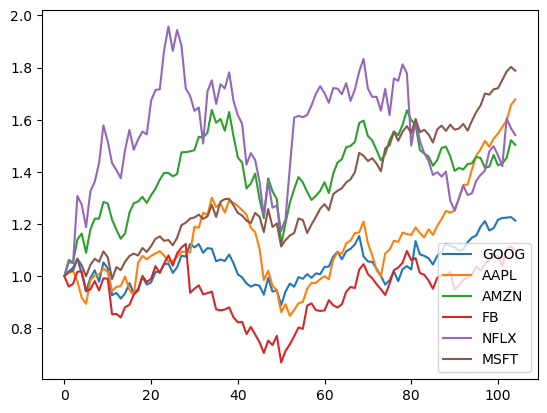

In [114]:
import pandas as pd
df=pd.DataFrame(stocks)
df.plot()
plt.legend(loc=4)

## Esercizio 2
### da plotly.express importiamo il dataset elections, mediante: 
### from plotly import express as px
### election = px.data.election()
* Disegnamo un grafico a barre dove confrontiamo i voti totali presi dai tre candidati
* Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti
* Visualizzarlo sia in formato appaiato che impilato (stacked)
* Salvare entrambi i grafici su disco in alta risoluzione

In [28]:
from plotly import express as px
election = px.data.election()

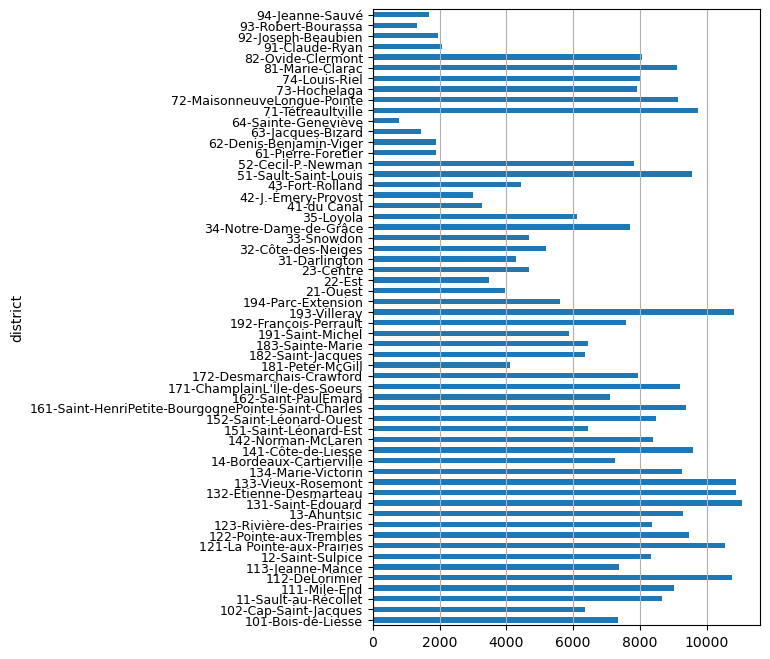

In [57]:
# disegnamo un grafico a barre dove confrontiamo i voti totali presi dai tre candidati
election=px.data.election()
election.set_index("district",inplace=True)
plt.figure(figsize=[5,8])
election.total.plot(kind="barh")
plt.yticks(fontsize=9)
plt.grid(axis="x");

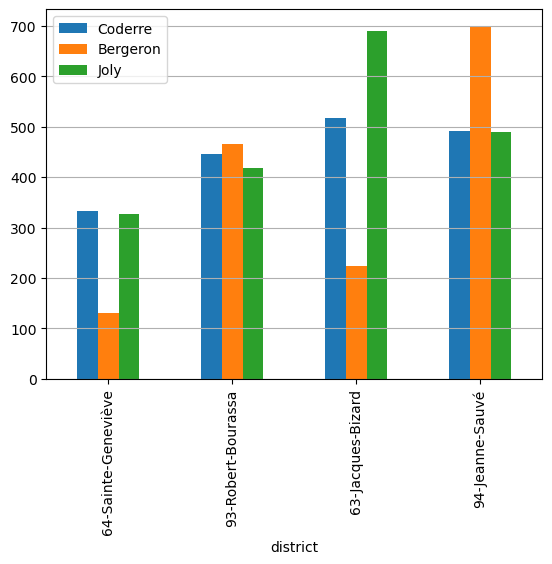

In [73]:
#visualizziamo un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti
election.sort_values("total",inplace=True)
distretti=election.iloc[:4, :3]
distretti.plot(kind="bar")
plt.grid(axis="y")
plt.savefig("grafico_a_barre_appaiato.png", dpi=600);

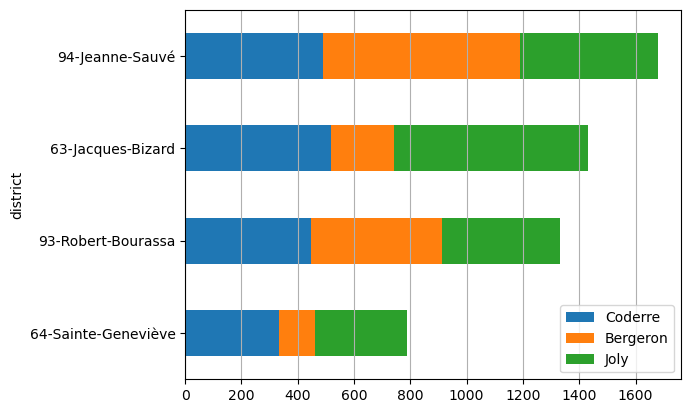

In [75]:
#visualizzarlo sia in formato appaiato(vedi sopra), che impilato(stacked)
distretti.plot(kind="barh", stacked=True)
plt.grid(axis="x")
plt.savefig("grafico_a_barre_impilato.png", dpi=600);

In [74]:
#salvare entrami i grafici in alta risoluzione
#plt.savefig("grafico_a_barre_appaiato.png", dpi=600)
#plt.savefig("grafico_a_barre_impilato.png", dpi=600)

## Esercizio 3
### da seaborn importiamo il dataset titanic, mediante:
### import seaborn as sns
### titanic=sns.load_dataset('titanic')
* Quanti ponti c'erano sulla nave?
* Ci sono dati mancanti? Dove? Quanti? Come potremmo gestirli?
* Tramite seaborn visualizziamo un jointpoint sulle colonne fare e age; che cosa stiamo guardando?

In [76]:
import seaborn as sns
titanic=sns.load_dataset('titanic')

In [79]:
# Quanti ponti c'erano sulla nave?
ponti=set(titanic["deck"])
len(ponti)

8

In [83]:
#Ci sono dati mancanti? Dove? Quanti? Come potremmo gestirli?
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [94]:
##possiamo optare di inserire i valori dell'età in base alla media della tariffa pagata.
titanic.groupby("age").fare.mean()

age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: fare, Length: 88, dtype: float64

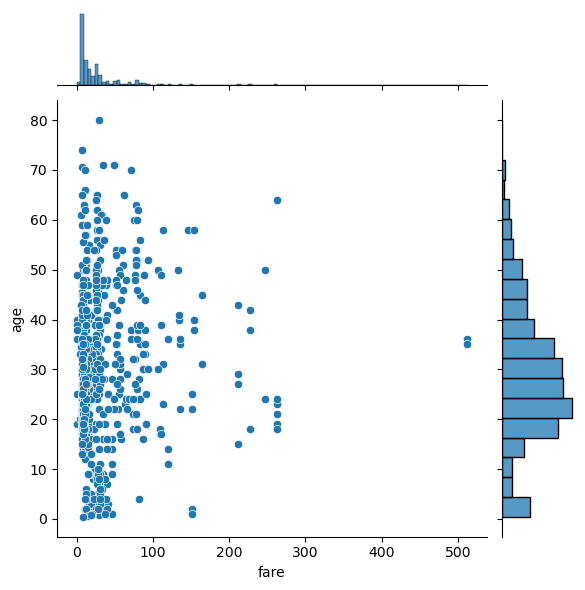

In [97]:
#tramite seaborn visualizziamo un jointplot sulle colonne fare e age; che cosa stiamo guardando?
sns.jointplot(data=titanic, x="fare", y="age")

### possiamo notare che intorno ai 15/20 anni, esistono tariffe già parecchio costose, e che le tariffe più costose sono state pagate intorno ai 40 anni.

## Seconda parte esercizio
* Visualizzare un grafico con la differenza tra il numero di passeggeri di ogni classe di imbarco
* Fare la stessa cosa per le colonne alive
* Qual' era la distribuzione delle tariffe (fare)?
* Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con uno swarmplot
* Visualizziamo un kdeplot per la colonna age
* Visualizziamo un boxplot e un lmplot rispetto alle colonne fare e survived che cose ne deduciamo?

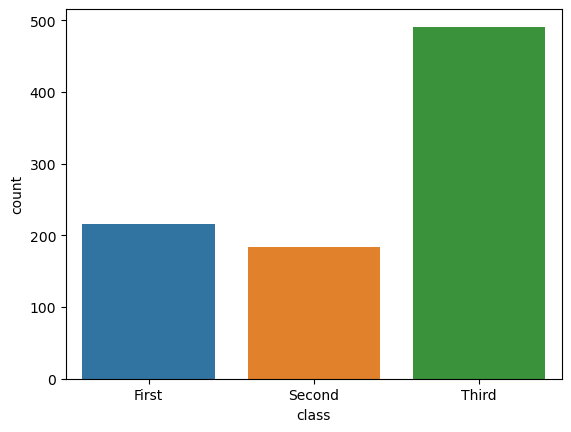

In [106]:
#Visualizzare un grafico con la differenza tra il numero di passeggeri di ogni classe di imbarco
sns.countplot(data=titanic, x="class");

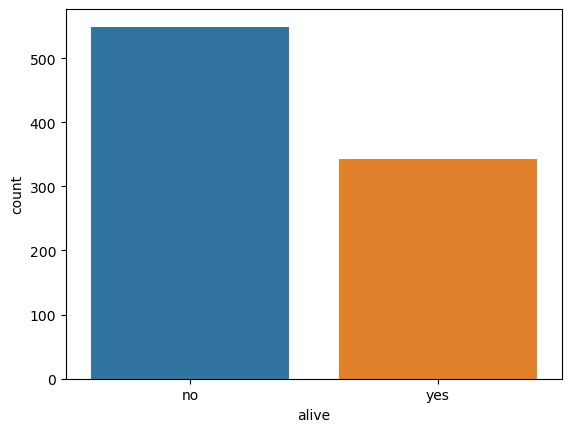

In [105]:
#stessa cosa con la colonna alive
sns.countplot(data=titanic, x="alive");

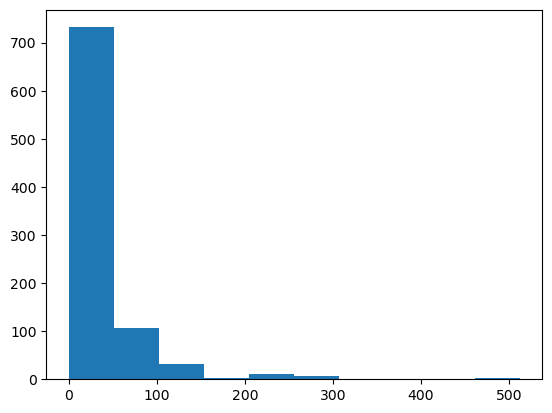

In [104]:
#Qual' era la distribuzione delle tariffe (fare)?
plt.hist(titanic["fare"]);

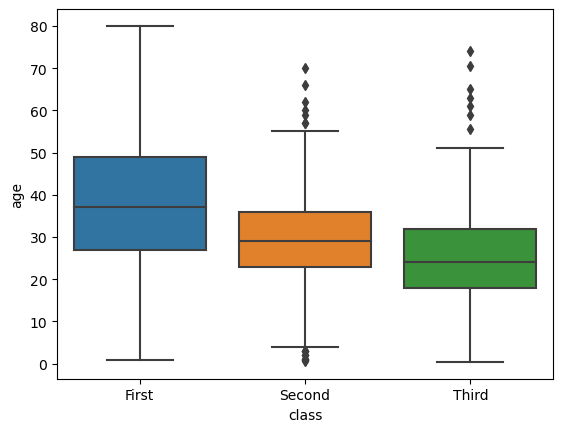

In [108]:
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con uno swarmplot
sns.boxplot(data=titanic, x="class", y="age");

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


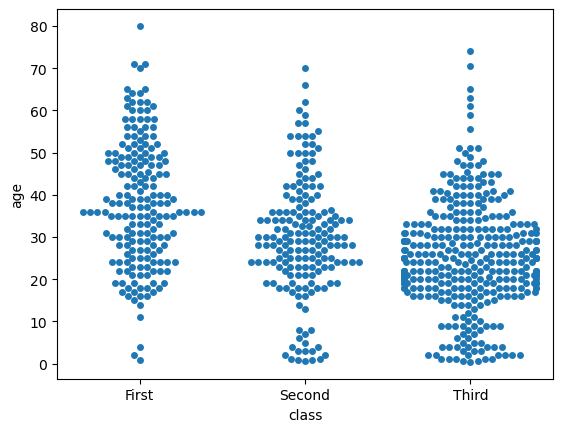

In [109]:
#swarmplot
sns.swarmplot(data=titanic, x="class", y="age");

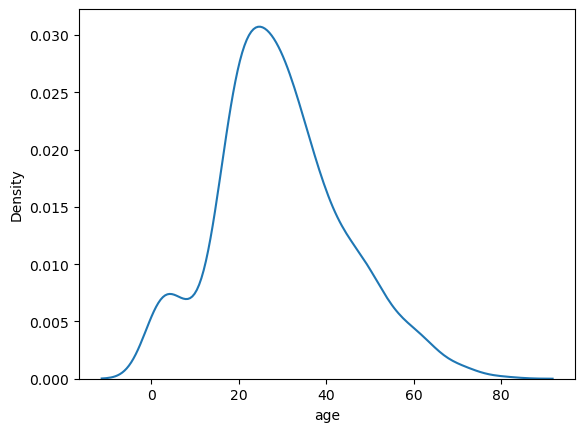

In [111]:
#visualizziamo un kdeplot per la colonna age
sns.kdeplot(data=titanic["age"]);

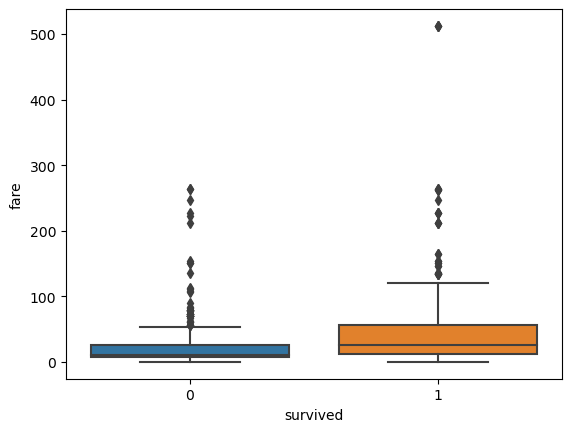

In [112]:
#Visualizziamo un boxplot e un lmplot rispetto alle colonne fare e survived che cose ne deduciamo?
sns.boxplot(data=titanic, x="survived", y="fare");

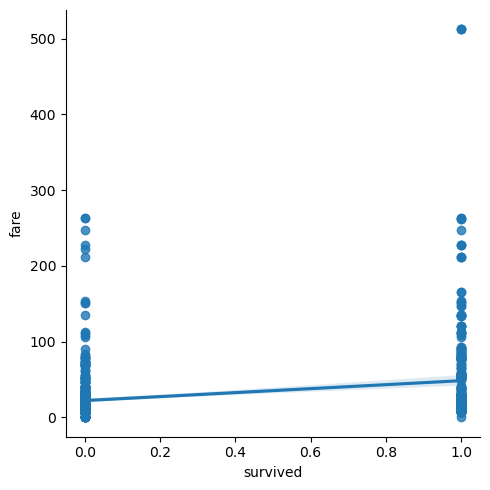

In [114]:
#lmplot
sns.lmplot(data=titanic, x="survived", y="fare");

#### si deduce subito che i pazienti sopravvissuti avessero pagato una tariffa più alta.

## Terza Parte
### Realizziamo un grafico scatter interattivo tramite plotly.express dove avremo:
* l'età sull'asse x e il ponte sull'asse y
* il colore rispetto a se la persona è sopravvissuta o meno
* la dimensione del marker rispetto alla tariffa
* il simbolo (tramite il parametro symbol=) rispetto alla colonna sex.
* riordiniamo l'asse y in modo che rispetti la disposizione dei ponti, mediante il parametro category_orders={"deck": list("ABCDEFG")}
### Che conclusioni possiamo trarne?

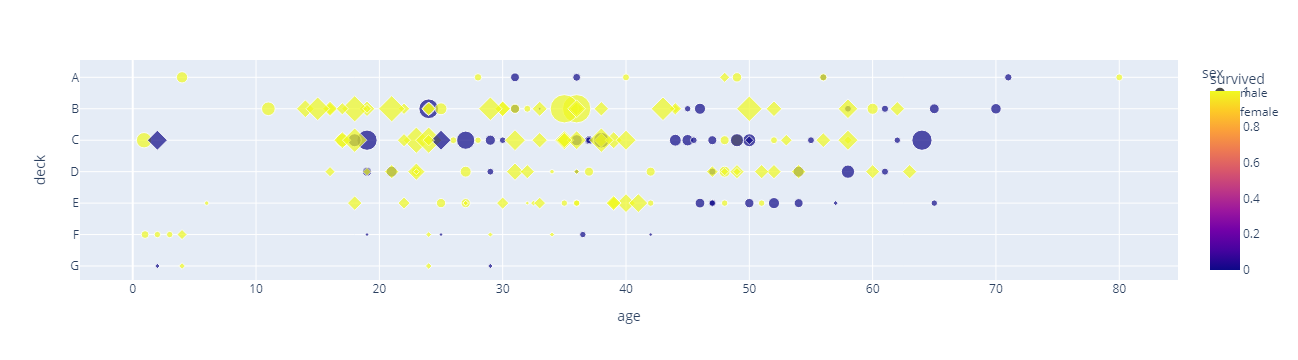

In [125]:
px.scatter(data_frame=titanic, x="age", y="deck", color="survived", size="fare", symbol="sex", category_orders={"deck": list("ABCDEFG")})

#### Possiamo dunque dire che la maggior parde dei deceduti sono situati sul ponte C, mentre sul ponte B, avendo pagato una tariffa ampiamente maggiore come evidenziato dalla dimensione dei marker, sono sopravvissute più persone.